## Final Code

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt

In [2]:
# load train and test dataset
def load_dataset():
    # load dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # building the input vector from the 28x28 pixels
    X_train = X_train.reshape(60000, 784)
    X_test = X_test.reshape(10000, 784)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    # normalizing the data to help with the training
    X_train /= 255
    X_test /= 255
    
    return X_train, y_train, X_test, y_test
    

In [3]:
# scale pixels
def prep_pixels(y_train, y_test):
    
    # one-hot encoding using keras' numpy-related utilities
    from keras.utils import np_utils
    n_classes = 10
    Y_train = np_utils.to_categorical(y_train, n_classes)
    Y_test = np_utils.to_categorical(y_test, n_classes)
    
    return Y_train, Y_test

In [4]:
# define cnn model with One hidden Layer
def define_model(af):
    model = keras.Sequential([
    layers.Dense(units=10, input_shape=(784,), activation=af)])
    # compiling the sequential model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    return model

In [5]:
# training the model and saving metrics in history
def train_model(af):
    
    # loading the dataset
    X_train, y_train, X_test, y_test = load_dataset()
    
    # scale pixels
    Y_train, Y_test = prep_pixels(y_train,y_test)
    
    # define cnn model with One hidden Layer
    model = define_model(af)
    print('-----------------------------------'+af+'-----------------------------------')
    history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=2,
          validation_data=(X_test, Y_test))
    
    # saving the model
    from tensorflow.keras.models import load_model
    model.save('HappyMonk_Model_mnist.h5')
    
    
    return history
    

In [6]:
model_history = {}

In [7]:
def train_AF():
    
    af_list = ['linear','softmax','tanh']
    for i in af_list:
        model_history.update({i:train_model(i)})       
    return model_history   

In [8]:
def remove_nan(dict_obj):
    from math import isnan
    # dict comprehension
    clean_dict = {k: dict_obj[k] for k in dict_obj if not isnan(dict_obj[k])}
    return clean_dict

In [9]:
def get_best_acc_af(af_acc):
    Keymax = max(af_acc, key=af_acc.get)
    return Keymax

In [10]:
def get_best_loss_af(af_loss):
    Keymax = min(af_loss, key=af_loss.get)
    return Keymax

In [11]:
af_accuracy_mean = {}
af_loss_mean = {}
clean_dict_accuracy = {}
clean_dict_loss = {}

In [12]:
def get_best_af():
    from statistics import mean
    model_history = train_AF()
    for x,y in model_history.items():
        af_accuracy_mean.update({x: mean(y.history['accuracy'])})
        af_loss_mean.update({x: mean(y.history['loss'])})
    
    clean_dict_accuracy = remove_nan(af_accuracy_mean)
    clean_dict_loss = remove_nan(af_loss_mean)
    # filter best acc_af
    best_acc_af = get_best_acc_af(clean_dict_accuracy)
    # filter best loss_af
    best_loss_af = get_best_loss_af(clean_dict_loss)
    
    return best_acc_af,best_loss_af
 

In [13]:
def train_final_model():
    acc_af,loss_af = get_best_af()
    history = train_model(loss_af)
    
    
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.legend()
    #plt.show()
    plt.savefig(loss_af+'_Final_LossVal_loss')
    from IPython.display import Image
    Image(filename=loss_af+'_Final_LossVal_loss.png') 
    
    
    # plot the accuracy
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.legend()
    #plt.show()
    plt.savefig(loss_af+'_Final_AccVal_acc')
    from IPython.display import Image
    Image(filename=loss_af+'_Final_AccVal_acc.png') 
    

-----------------------------------linear-----------------------------------
Epoch 1/5
469/469 - 1s - loss: 9.0011 - accuracy: 0.1470 - val_loss: 9.7927 - val_accuracy: 0.1313
Epoch 2/5
469/469 - 1s - loss: 9.4701 - accuracy: 0.1552 - val_loss: 10.4542 - val_accuracy: 0.1519
Epoch 3/5
469/469 - 1s - loss: 9.5658 - accuracy: 0.1503 - val_loss: 8.9082 - val_accuracy: 0.1434
Epoch 4/5
469/469 - 1s - loss: 9.3661 - accuracy: 0.1142 - val_loss: 9.6502 - val_accuracy: 0.0972
Epoch 5/5
469/469 - 1s - loss: 8.7861 - accuracy: 0.1099 - val_loss: 8.9068 - val_accuracy: 0.1344
-----------------------------------softmax-----------------------------------
Epoch 1/5
469/469 - 1s - loss: 0.6897 - accuracy: 0.8290 - val_loss: 0.3880 - val_accuracy: 0.9008
Epoch 2/5
469/469 - 1s - loss: 0.3643 - accuracy: 0.9016 - val_loss: 0.3209 - val_accuracy: 0.9126
Epoch 3/5
469/469 - 1s - loss: 0.3204 - accuracy: 0.9125 - val_loss: 0.2984 - val_accuracy: 0.9176
Epoch 4/5
469/469 - 1s - loss: 0.3006 - accuracy: 0.

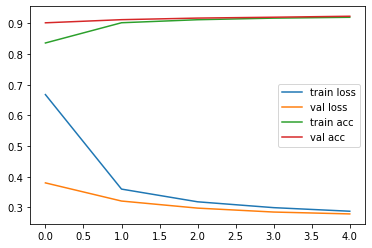

In [14]:
train_final_model()

In [15]:
mnist_model = load_model('HappyMonk_Model_mnist.h5')

# loading the dataset
X_train, y_train, X_test, y_test = load_dataset()
    
# scale pixels
Y_train, Y_test = prep_pixels(y_train,y_test)



loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.2785 - accuracy: 0.9234
Test Loss 0.27846020460128784
Test Accuracy 0.9233999848365784


In [16]:
predicted_classes = mnist_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
from sklearn.metrics import f1_score

f1_score(y_test, predicted_classes,average='macro')

0.9223876185408042

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.87      0.88       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.86      0.90      0.88       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [17]:
# see which we predicted correctly and which not
import numpy as np
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


9234  classified correctly
766  classified incorrectly


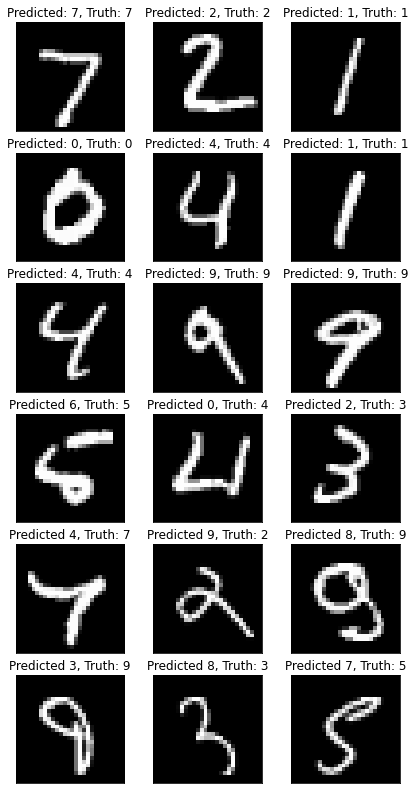

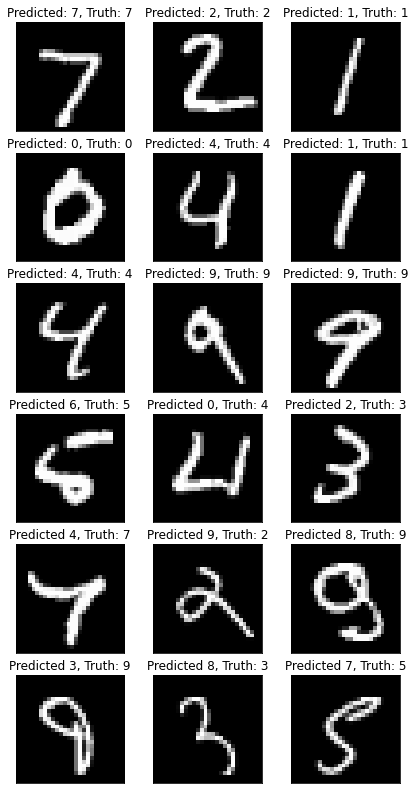

In [18]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation